In [2]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_pickle('../data/df6.pkl')
data

,ID,DELTA,YEAR_DAY,DATE,MEAN_CONSUMPTION,VARIANCE_CONSUMPTION,WEEKDAY,IS_WEEKEND,sin_WEEKDAY,cos_WEEKDAY,sin_year_day,cos_year_day,PRECIPITATIONS,MIN_TEMP,MEAN_TEMP,MAX_TEMP,SUN,IS_GOOD
0,0,243.000000,0,2019-02-01,282.893151,1.145364e+04,4,0,-0.433884,-0.900969,0.000000,1.000000,0.0,16.5,17.6,18.7,7.1,1
1,0,236.000000,1,2019-02-02,282.893151,1.145364e+04,5,1,-0.974928,-0.222521,0.017213,0.999852,0.0,9.8,13.4,17.1,6.1,1
2,0,335.000000,2,2019-02-03,282.893151,1.145364e+04,6,1,-0.781831,0.623490,0.034422,0.999407,0.0,7.7,10.6,13.6,9.3,1
3,0,252.000000,3,2019-02-04,282.893151,1.145364e+04,0,0,0.000000,1.000000,0.051620,0.998667,0.0,4.1,10.6,17.2,9.3,1
4,0,220.000000,4,2019-02-05,282.893151,1.145364e+04,1,0,0.781831,0.623490,0.068802,0.997630,0.0,7.5,14.6,21.6,9.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002650,2756,414.904301,360,2020-01-27,616.230144,1.477866e+06,0,0,0.000000,1.000000,-0.085965,0.996298,0.0,7.6,13.0,18.4,7.6,-1
1002651,2756,411.301918,361,2020-01-28,616.230144,1.477866e+06,1,0,0.781831,0.623490,-0.068802,0.997630,0.0,13.8,15.8,17.9,0.4,-1
1002652,2756,418.423941,362,2020-01-29,616.230144,1.477866e+06,2,0,0.974928,-0.222521,-0.051620,0.998667,0.0,14.7,18.6,22.4,2.4,-1
1002653,2756,400.926486,363,2020-01-30,616.230144,1.477866e+06,3,0,0.433884,-0.900969,-0.034422,0.999407,0.0,13.0,17.6,22.2,5.3,-1


In [4]:
data_outliers = data.drop(['YEAR_DAY', 
                            'MEAN_CONSUMPTION', 
                            'VARIANCE_CONSUMPTION', 
                            'WEEKDAY', 
                            'IS_WEEKEND', 
                            'sin_WEEKDAY', 
                            'cos_WEEKDAY', 
                            'sin_year_day', 
                            'cos_year_day', 
                            'PRECIPITATIONS', 
                            'MIN_TEMP', 
                            'MEAN_TEMP', 
                            'MAX_TEMP', 
                            'SUN', 
                            'IS_GOOD'], axis=1)
data_outliers.set_index('DATE', inplace = True)
data_outliers.head(2)

,ID,DELTA
DATE,,
2019-02-01,0,243.0
2019-02-02,0,236.0


In [5]:
print('Media:',data_outliers['DELTA'].mean())

# First quartile (Q1)
Q1 = np.percentile(data_outliers['DELTA'], 25, interpolation = 'midpoint')
# Third quartile (Q3)
Q3 = np.percentile(data_outliers['DELTA'], 75, interpolation = 'midpoint')
# Interquaritle range (IQR)
IQR = Q3 - Q1
IQR
# Printeo de limite superior para outliers para comparar con media
print('Bigote superior:', Q3 + 1.5 * IQR)

Media: 661.3814089217626
Bigote superior: 712.5


<AxesSubplot:xlabel='DATE'>

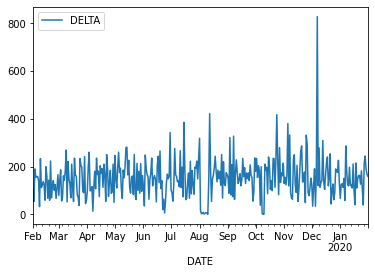

In [6]:
data_outliers_un_contador = data_outliers[data_outliers['ID'] == 14]
data_outliers_sin_id = data_outliers_un_contador.drop(['ID'], axis = 1)
data_outliers_sin_id.plot()

In [7]:
# Lista con todos los contadores
contadores = data['ID'].unique()
contadores

array([   0,    1,    2, ..., 2748, 2749, 2756], dtype=int64)

In [13]:
def corrector_de_outliers(dataframe, contadores):
    #Puesta a punto del df6.pkl o cualquier version posterior que tenga su formato
    #Dropeo de variables que no sirven
    dataset_a_estudiar = dataframe.drop(['YEAR_DAY', 
                            'MEAN_CONSUMPTION', 
                            'VARIANCE_CONSUMPTION', 
                            'WEEKDAY', 
                            'IS_WEEKEND', 
                            'sin_WEEKDAY', 
                            'cos_WEEKDAY', 
                            'sin_year_day', 
                            'cos_year_day', 
                            'PRECIPITATIONS', 
                            'MIN_TEMP', 
                            'MEAN_TEMP', 
                            'MAX_TEMP', 
                            'SUN', 
                            'IS_GOOD'], axis = 1)
    #Date como index
    dataset_a_estudiar.set_index('DATE', inplace = True)
    
    #Preparación del dataset de respuesta
    #Con esta linea nos quedamos con 365 filas
    dataset_respuesta = dataset_a_estudiar[dataset_a_estudiar['ID'] == 0]
    #Con esta linea nos quedamos con solo el index fechas
    dataset_respuesta = dataset_respuesta.drop(['ID', 
                            'DELTA'], axis = 1)

    for contador in contadores:
        contador_a_estudiar = dataset_a_estudiar[dataset_a_estudiar['ID'] == contador] 

        # First quartile (Q1)
        Q1 = np.percentile(contador_a_estudiar['DELTA'], 25, interpolation = 'midpoint')
        # Third quartile (Q3)
        Q3 = np.percentile(contador_a_estudiar['DELTA'], 75, interpolation = 'midpoint')
        # Interquaritle range (IQR)
        IQR = Q3 - Q1

        #Drop ID
        contador_a_estudiar = contador_a_estudiar.drop(['ID'], axis=1)
        
        #Iteración sobre filas en DF
        #Si se sale de los bigotes del boxplot se imputa a la media
        contador_a_estudiar['DELTA'].mask(contador_a_estudiar['DELTA'] > Q3 + 1.5 * IQR, contador_a_estudiar['DELTA'].mean(), inplace=True)
        contador_a_estudiar['DELTA'].mask(contador_a_estudiar['DELTA'] < Q1 - 1.5 * IQR, contador_a_estudiar['DELTA'].mean(), inplace=True)

        dataset_respuesta[f'DELTA_{contador}'] = contador_a_estudiar

    return(dataset_respuesta)

In [14]:
%%capture
dataset_sin_outliers = corrector_de_outliers(data, contadores)

In [15]:
dataset_sin_outliers

,DELTA_0,DELTA_1,DELTA_2,DELTA_3,DELTA_4,DELTA_5,DELTA_6,DELTA_7,DELTA_8,DELTA_9,...,DELTA_2739,DELTA_2742,DELTA_2743,DELTA_2744,DELTA_2745,DELTA_2746,DELTA_2747,DELTA_2748,DELTA_2749,DELTA_2756
DATE,,,,,,,,,,,,,,,,,,,,,
2019-02-01,243.0,8.000000,0.0,492.0,247.56,314.208164,80.000000,45.000000,4.000000,109.0,...,15.0,205.637255,553.219919,553.219919,614.969444,582.933333,553.219919,435.831081,116.787879,553.219919
2019-02-02,236.0,11.690411,0.0,381.0,235.67,0.000000,174.597598,36.000000,0.000000,305.0,...,15.0,205.637255,395.367342,395.367342,614.969444,582.933333,395.367342,435.831081,116.787879,395.367342
2019-02-03,335.0,6.000000,0.0,313.0,254.33,0.000000,69.000000,144.052055,0.000000,205.0,...,15.0,205.637255,410.355298,410.355298,614.969444,582.933333,410.355298,435.831081,116.787879,410.355298
2019-02-04,252.0,12.000000,0.0,362.0,412.00,0.000000,270.000000,144.052055,7.603151,287.0,...,15.0,205.637255,516.355438,516.355438,614.969444,582.933333,516.355438,435.831081,116.787879,516.355438
2019-02-05,220.0,11.690411,0.0,380.0,269.00,0.000000,227.000000,63.000000,0.000000,150.0,...,15.0,205.637255,436.190532,436.190532,614.969444,582.933333,436.190532,435.831081,116.787879,436.190532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-27,213.0,4.000000,39.0,289.0,263.06,0.000000,204.000000,118.000000,7.603151,149.0,...,15.0,205.637255,414.904301,414.904301,614.969444,582.933333,414.904301,435.831081,116.787879,414.904301
2020-01-28,232.0,1.000000,40.0,380.0,303.94,0.000000,169.000000,135.000000,7.603151,166.0,...,15.0,205.637255,411.301918,411.301918,614.969444,582.933333,411.301918,435.831081,116.787879,411.301918
2020-01-29,403.0,2.000000,45.0,404.0,421.00,0.000000,195.000000,77.000000,7.603151,101.0,...,15.0,205.637255,418.423941,418.423941,614.969444,582.933333,418.423941,435.831081,116.787879,418.423941


<AxesSubplot:xlabel='DATE'>

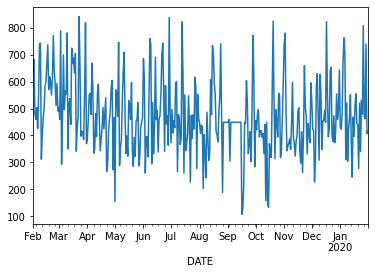

In [16]:
dataset_sin_outliers['DELTA_100'].plot()

In [17]:
dataset_sin_outliers.to_pickle('../data/dataset_sin_outliers.pkl')

In [18]:
dataset_sin_outliers.isnull().values.any()

False

<AxesSubplot:xlabel='DATE'>

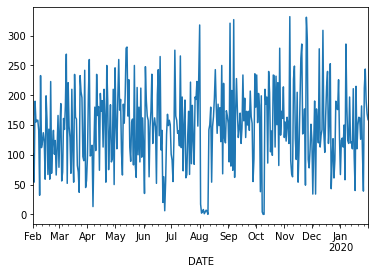

In [20]:
data_sin_outliers_2 = dataset_sin_outliers['DELTA_14']
data_sin_outliers_2.plot()